#Tarea 2
##Diego Alberto Martinez Simbaqueva

Vamos a solucionar un pequeño problema de clasificación que ya fue trabajado en la herramienta de "Tensorflow- Playground".

#Solución

Llamamos las librerías necesarias Y creamos los datos para esta tarea:

In [57]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['DatosTensor4.csv']), delimiter=';')

Saving DatosTensor4.csv to DatosTensor4.csv


Ahora, creamos la red y la entrenamos con los datos de entrenamiento y prueba

In [72]:
# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codifica la variable categórica "G" a valores numéricos
label_encoder = LabelEncoder()
df2['G_encoded'] = label_encoder.fit_transform(df2['G'])

# Escala las variables "X" y "Y"
scaler = StandardScaler()
df2[['X', 'Y']] = scaler.fit_transform(df2[['X', 'Y']])

# Divide los datos en conjuntos de entrenamiento y prueba
X = df2[['X', 'Y']].values
y = df2['G_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construye el modelo de clasificación con TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Entrada de dos características: X y Y
    tf.keras.layers.Dense(4, activation='relu'),  # Capa oculta con activación ReLU
    tf.keras.layers.Dense(5, activation='relu'),  # Otra capa oculta
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Capa de salida con activación softmax
])

# Compila el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

Epoch 1/50
2/2 [==============================] - 2s 556ms/step - loss: 0.6846 - accuracy: 0.5938 - val_loss: 0.6913 - val_accuracy: 0.7500
Epoch 2/50
2/2 [==============================] - 0s 163ms/step - loss: 0.6838 - accuracy: 0.6406 - val_loss: 0.6913 - val_accuracy: 0.7500
Epoch 3/50
2/2 [==============================] - 0s 136ms/step - loss: 0.6833 - accuracy: 0.7188 - val_loss: 0.6916 - val_accuracy: 0.8750
Epoch 4/50
2/2 [==============================] - 0s 109ms/step - loss: 0.6830 - accuracy: 0.7344 - val_loss: 0.6916 - val_accuracy: 0.8750
Epoch 5/50
2/2 [==============================] - 0s 58ms/step - loss: 0.6827 - accuracy: 0.6719 - val_loss: 0.6916 - val_accuracy: 0.6250
Epoch 6/50
2/2 [==============================] - 0s 73ms/step - loss: 0.6824 - accuracy: 0.6250 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 101ms/step - loss: 0.6820 - accuracy: 0.5469 - val_loss: 0.6917 - val_accuracy: 0.4375
Epoch 8/50
2/2 [======

Tras obtener una precisión del 75% en el conjunto de test, procedemos a graficar los resultados obtenidos para el conjunto de test:


388/388 [==============================] - 1s 2ms/step


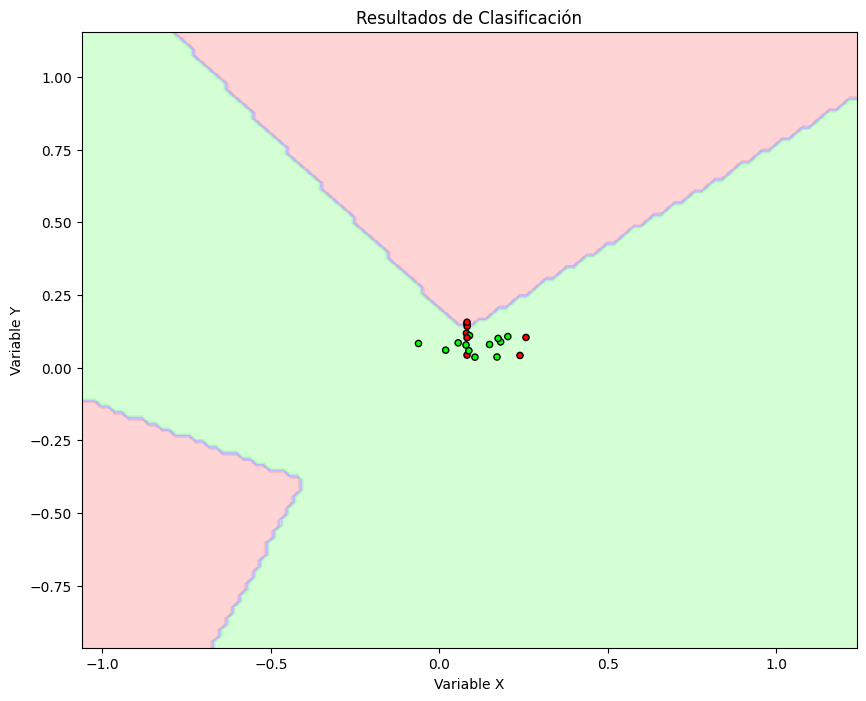

In [73]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Supongamos que ya tienes el modelo entrenado llamado "model" y los datos de prueba "X_test" y "y_test".

# Definir una malla para el gráfico
h = 0.02  # Tamaño de paso en la malla
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Crear un mapa de colores para las regiones de decisión
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])

# Crear el gráfico de dispersión de los datos de prueba
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']), edgecolor='k', s=20)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Resultados de Clasificación')
plt.show()